In [31]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from descartes import PolygonPatch
from shapely.geometry import Point, Polygon, MultiPolygon

In [210]:
def generate_data(**kwargs):
    lower_limit = kwargs.get('lower_limit', 0) 
    upper_limit = kwargs.get('upper_limit', 100) 
    n_samples = kwargs.get('n_samples', 100)
    resolution = kwargs.get('resolution', None) 
    
    if resolution:
        width = resolution
        height = resolution
    else:
        width = kwargs.get('width', 10)
        height = kwargs.get('height', 10)
    
    grid = gpd.GeoDataFrame()
    for row in range(lower_limit+height, upper_limit+height, height):
        for col in range(lower_limit+width, upper_limit+width, width):
            poly = Polygon(((col-width, row), (col, row), (col, row-height), 
                           (col-width, row-height),(col-width, row)))
            temp = gpd.GeoDataFrame({'geometry': [poly]})
            grid = grid.append(temp)
    grid.reset_index(drop=True, inplace=True)
    
    x = np.random.uniform(lower_limit, upper_limit, n_samples)
    y = np.random.uniform(lower_limit, upper_limit, n_samples)
    points = gpd.GeoDataFrame(data={'x':x, 'y':y})
    points['geometry'] = points.apply(lambda row: Point((row['x'], row['y'])), axis=1)
    rtree_index = points.sindex
    
    return grid, points, rtree_index

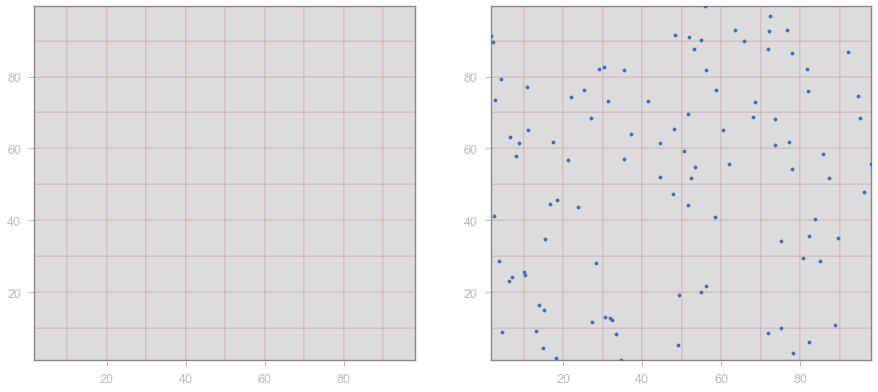

In [213]:
grid, points, rtree_index = generate_data()
west, south, east, north = points.unary_union.bounds

fig, ax = plt.subplots(1, 2, figsize=(15, 6.5))

for i, g in grid['geometry'].iteritems():
    patch = PolygonPatch(g, fc='#dcdcdc', ec='r', zorder=2)
    patch2 = PolygonPatch(g, fc='#dcdcdc', ec='r', zorder=2)
    ax[0].add_patch(patch)
    ax[1].add_patch(patch2)

ax[0].set_xlim(west, east)
ax[0].set_ylim(south, north)
ax[1].set_xlim(west, east)
ax[1].set_ylim(south, north)

ax[1].scatter(points.iloc[:, 0].values, points.iloc[:, 1].values, 
              zorder=3, marker='.', color='b')